# 计算同一个文档中化合物的Tanimoto Coeffcient

In [30]:
import rdkit
from rdkit import Chem
import pandas as pd
from rdkit.Chem import MACCSkeys
import math
import numpy as np
import seaborn as sns

In [31]:
#将被计算相似度的分子从文件中提取出来,训练集文件
path=r"C:\Users\wsy\Desktop\initial_save_train.csv"
dataset=pd.read_csv(path,encoding="GBK")
smiles_list=list(dataset["SMILES"])
len(smiles_list)

5

In [32]:
#定义计算函数，输入为MACCS_CEP（DataFrame格式），DataFrame文本格式，返回值为分子与CEP的tanimoto系数
def compute(MACCS_CEP,smiles):
    mol = Chem.MolFromSmiles(smiles)
    fps = list(MACCSkeys.GenMACCSKeys(mol))[1:]
    head=['MACCS_'+str(i) for i in range(1,167)]
    empty_dict=dict(list(zip(head,fps)))
    MACCS_smiles=pd.DataFrame(empty_dict,index=["smiles"])
    final=MACCS_smiles.append(MACCS_CEP)
    c=0
    for i in head:
        if final[i]["CEP"]==final[i]["smiles"]:
            c=c+1
    return c/(166+166-c)

In [33]:
#计算出CEP的MACCS指纹并且存到DataFrame里面
def main(smiles):
    CEP=smiles
    mol = Chem.MolFromSmiles(CEP)
    fps = list(MACCSkeys.GenMACCSKeys(mol))[1:]
    head=['MACCS_'+str(i) for i in range(1,167)]
    empty_dict=dict(list(zip(head,fps)))
    MACCS_CEP=pd.DataFrame(empty_dict,index=['CEP'])
    #调用函数，计算tanimoto系数，并且存储到原来的数据中
    tanimoto_list=[]
    for smiles in smiles_list:
        tanimoto=compute(MACCS_CEP,smiles)
        tanimoto_list.append(tanimoto)
    return tanimoto_list

In [34]:
number_list=[]
index_list=[]
for smiles in smiles_list:
    print(smiles)
    tanimoto_list=main(smiles)
    dataset[smiles]=tanimoto_list
    number=min(tanimoto_list)
    number_list.append(number)
    index=tanimoto_list.index(number)
    index_list.append(index)

O=C(OCC)CCCN1C(=O)Oc2c1cc1c(Nc3cc4c([nH]nc4)cc3)ncnc1c2
Clc1c(OCc2ccc(Cl)cc2)ccc(Nc2ncnc3c2cc2N(CCCC(=O)OCC)C(=O)Oc2c3)c1
O=C(OCC)CCCN1C(=O)Oc2c1cc1c(Nc3cc(O)ccc3)ncnc1c2
O=C(OCC)CCCN1C(=O)Oc2c1cc1c(Nc3ccc(OC(C)C)cc3)ncnc1c2
Clc1ccc(COC(=O)c2ccc(Nc3ncnc4c3cc3N(CCCC(=O)OCC)C(=O)Oc3c4)cc2)cc1


In [35]:
data=dataset
data

,SMILES,O=C(OCC)CCCN1C(=O)Oc2c1cc1c(Nc3cc4c([nH]nc4)cc3)ncnc1c2,Clc1c(OCc2ccc(Cl)cc2)ccc(Nc2ncnc3c2cc2N(CCCC(=O)OCC)C(=O)Oc2c3)c1,O=C(OCC)CCCN1C(=O)Oc2c1cc1c(Nc3cc(O)ccc3)ncnc1c2,O=C(OCC)CCCN1C(=O)Oc2c1cc1c(Nc3ccc(OC(C)C)cc3)ncnc1c2,Clc1ccc(COC(=O)c2ccc(Nc3ncnc4c3cc3N(CCCC(=O)OCC)C(=O)Oc3c4)cc2)cc1
0,O=C(OCC)CCCN1C(=O)Oc2c1cc1c(Nc3cc4c([nH]nc4)cc...,1.000000,0.897143,0.930233,0.908046,0.897143
1,Clc1c(OCc2ccc(Cl)cc2)ccc(Nc2ncnc3c2cc2N(CCCC(=...,0.897143,1.000000,0.919075,0.919075,1.000000
2,O=C(OCC)CCCN1C(=O)Oc2c1cc1c(Nc3cc(O)ccc3)ncnc1c2,0.930233,0.919075,1.000000,0.930233,0.919075
3,O=C(OCC)CCCN1C(=O)Oc2c1cc1c(Nc3ccc(OC(C)C)cc3)...,0.908046,0.919075,0.930233,1.000000,0.919075
4,Clc1ccc(COC(=O)c2ccc(Nc3ncnc4c3cc3N(CCCC(=O)OC...,0.897143,1.000000,0.919075,0.919075,1.000000


In [36]:
num_inedx=data.shape[1]-1
num_columns=data.shape[0]
print('列数:',num_inedx,'  行数',num_columns)

列数: 5   行数 5


In [37]:
num_inedx=data.shape[1]-1
new_index=["mol_"+str(i) for i in range(num_columns)]
data.index=new_index
data=data.iloc[:,1:]#不取第一列
new_columns=["mol_"+str(i) for i in range(num_inedx)]
data.columns=new_columns
data

,mol_0,mol_1,mol_2,mol_3,mol_4
mol_0,1.000000,0.897143,0.930233,0.908046,0.897143
mol_1,0.897143,1.000000,0.919075,0.919075,1.000000
mol_2,0.930233,0.919075,1.000000,0.930233,0.919075
mol_3,0.908046,0.919075,0.930233,1.000000,0.919075
mol_4,0.897143,1.000000,0.919075,0.919075,1.000000


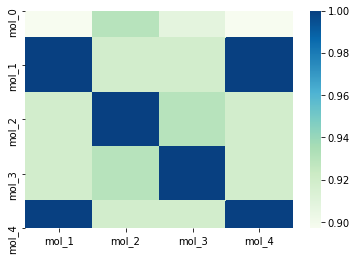

In [38]:
from matplotlib.pyplot import savefig
fig=sns.heatmap(data.iloc[:,1:],cmap='GnBu')
# savefig(r'C:\Users\wsy\Desktop\fig_B.png',dpi=150, bbox_inches='tight')#这一行用于将图片保存到本地